In [91]:
import mylib
from binance.client import Client
import matplotlib.pyplot as plt
import json
import pandas as pd

In [92]:
client = Client(
    mylib.api_key,
    mylib.secret_key,
    #  testnet=True
)

In [93]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07725000'},
 {'symbol': 'LTCBTC', 'price': '0.00254800'},
 {'symbol': 'BNBBTC', 'price': '0.01338900'},
 {'symbol': 'NEOBTC', 'price': '0.00049000'},
 {'symbol': 'QTUMETH', 'price': '0.00225700'},
 {'symbol': 'EOSETH', 'price': '0.00069200'},
 {'symbol': 'SNTETH', 'price': '0.00001926'},
 {'symbol': 'BNTETH', 'price': '0.00031900'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012480'},
 {'symbol': 'BNBETH', 'price': '0.17320000'},
 {'symbol': 'BTCUSDT', 'price': '24658.43000000'},
 {'symbol': 'ETHUSDT', 'price': '1904.89000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001202'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [94]:
cake = list()
for item in tickers:
    a = item["symbol"]
    if "CAKE" in a:
        print(item)
        cake.append(item)
    else:
        continue

{'symbol': 'CAKEBNB', 'price': '0.01348000'}
{'symbol': 'CAKEBUSD', 'price': '4.45100000'}
{'symbol': 'CAKEBTC', 'price': '0.00018030'}
{'symbol': 'CAKEUSDT', 'price': '4.45200000'}
{'symbol': 'CAKEGBP', 'price': '3.63700000'}
{'symbol': 'CAKEBRL', 'price': '69.72000000'}
{'symbol': 'CAKEAUD', 'price': '25.61000000'}


In [95]:
info = client.get_account()
df = pd.DataFrame(info["balances"])
df["free"] = df["free"].astype(float).round(4)
df = df[df["free"] > 0]
df

,asset,free,locked
4,BNB,1.224000e-01,0.00000000
188,BUSD,2.113000e-01,0.00000000
198,LDBUSD,7.713269e+02,0.00000000
201,LDUSDT,2.161347e+02,0.00000000
312,CAKE,3.608720e+01,0.00000000
336,AXS,9.113300e+00,0.00000000
419,SHIB,3.385182e+06,0.00


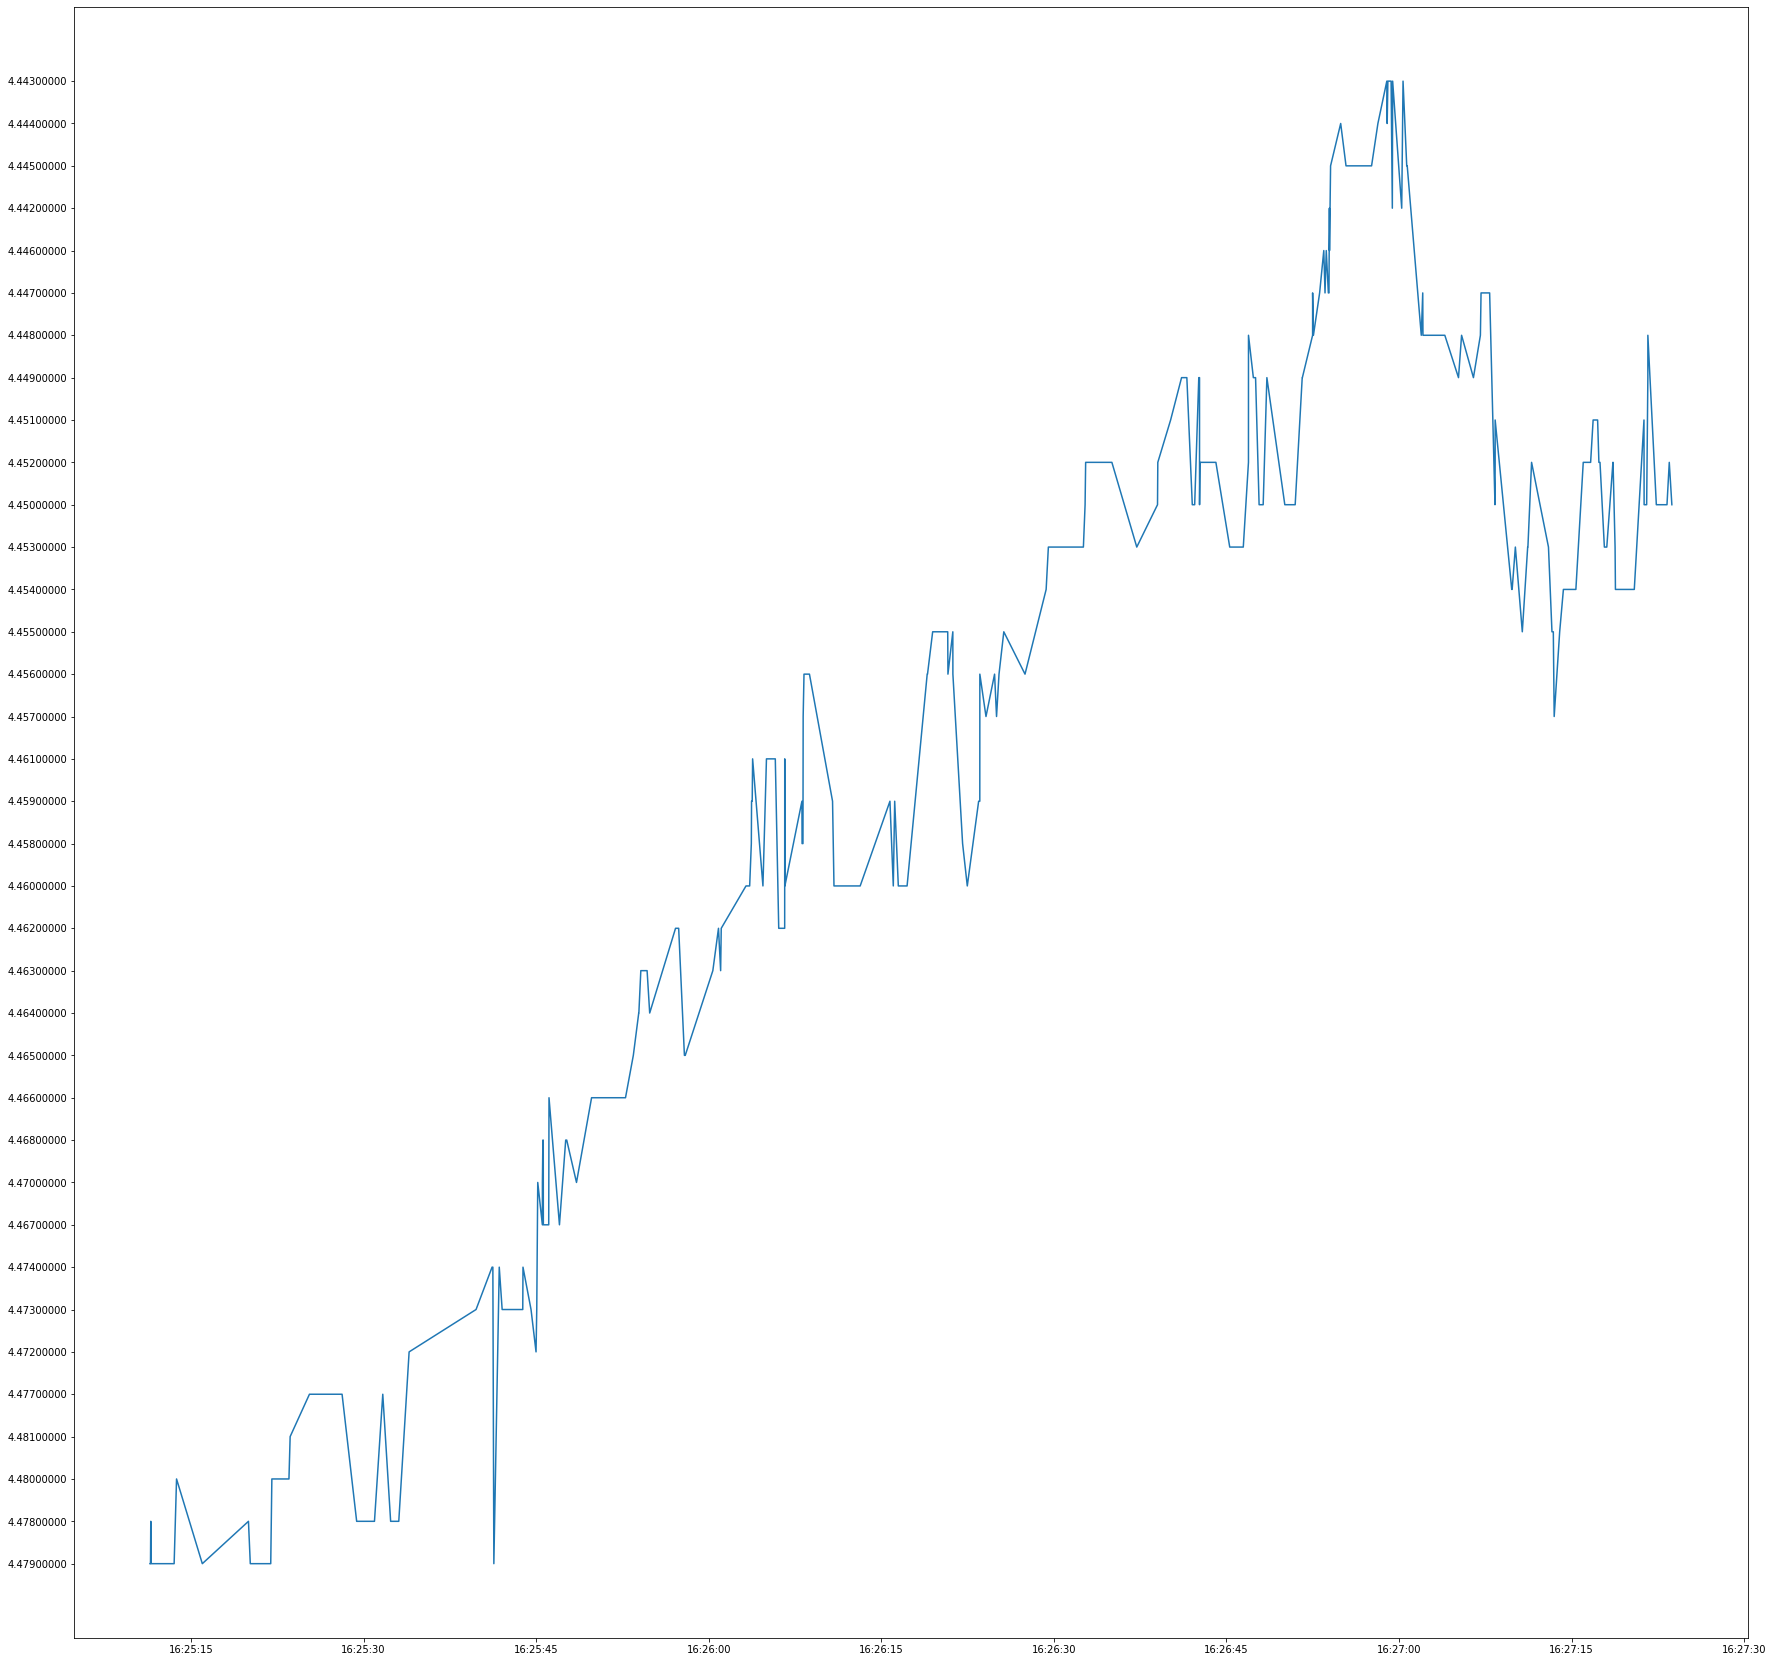

In [96]:
from datetime import datetime

trades = client.get_historical_trades(symbol="CAKEUSDT")
# print(trades)
cakehistory = dict()
for trade in trades:
    cakehistory[trade["time"]] = trade["price"]
    
times = list()
trades = list()
for key, value in cakehistory.items():
   times.append(datetime.fromtimestamp(int(key)/10000))
   trades.append(value)

   
plt.figure(figsize=(30, 30))
diagr = plt.plot(times, trades)


diagr
